## This script contains:
#### 1. Import libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the World Happiness Report Data
#### 6. Results

# 1. Import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'SPD2ks8nMRGkxcc3Rzgr'

In [3]:
# create path to folder

path = r'C:\Users\ejgor\OneDrive\Data Analytics\Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\World Happiness Report Analysis'

In [4]:
# import cleaned dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_2015-2019.csv'), index_col = False)

In [5]:
df.shape

(782, 10)

In [6]:
df.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [7]:
df.tail()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
777,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
778,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
779,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
780,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019
781,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019


In [8]:
df.dtypes

Country        object
Rank            int64
Score         float64
Support       float64
GDP           float64
Health        float64
Freedom       float64
Generosity    float64
Corruption    float64
Year            int64
dtype: object

In [9]:
# convert Year datatype to datetime

df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

In [10]:
df.dtypes

Country               object
Rank                   int64
Score                float64
Support              float64
GDP                  float64
Health               float64
Freedom              float64
Generosity           float64
Corruption           float64
Year          datetime64[ns]
dtype: object

In [11]:
df.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015-01-01
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015-01-01
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015-01-01
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015-01-01
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015-01-01


In [12]:
df.tail()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
777,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019-01-01
778,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019-01-01
779,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019-01-01
780,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019-01-01
781,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019-01-01


# 2. Subsetting, wrangling, and cleaning time-series data

#### Data set ranks countries happiness based on 6 factors (Support, GDP, Health, Freedom, Generosity, and Corruption). The data is compiled for the years 2015-2019, so there are no significant years where the happiness score of a country would have increased or decreased.

In [13]:
#  new dataset including the year and the score

df.drop(['Country', 'Rank', 'Support', 'GDP', 'Health', 'Freedom', 'Generosity', 'Corruption'], axis=1)

,Score,Year
0,7.587,2015-01-01
1,7.561,2015-01-01
2,7.527,2015-01-01
3,7.522,2015-01-01
4,7.427,2015-01-01
...,...,...
777,3.334,2019-01-01
778,3.231,2019-01-01
779,3.203,2019-01-01
780,3.083,2019-01-01


In [14]:
# changing the order of columns

df = df[['Year', 'Score']]

In [15]:
df.head()

,Year,Score
0,2015-01-01,7.587
1,2015-01-01,7.561
2,2015-01-01,7.527
3,2015-01-01,7.522
4,2015-01-01,7.427


In [16]:
# making year column the index

df = df.set_index('Year')

In [17]:
df.head()

,Score
Year,
2015-01-01,7.587
2015-01-01,7.561
2015-01-01,7.527
2015-01-01,7.522
2015-01-01,7.427


In [18]:
# create new df that groups each year by avg score

df_2 = df.groupby(['Year']).mean()

In [19]:
df_2

,Score
Year,
2015-01-01,5.375734
2016-01-01,5.382185
2017-01-01,5.354019
2018-01-01,5.375917
2019-01-01,5.407096


In [20]:
df_2.shape

(5, 1)

In [21]:
df_2.columns

Index(['Score'], dtype='object')

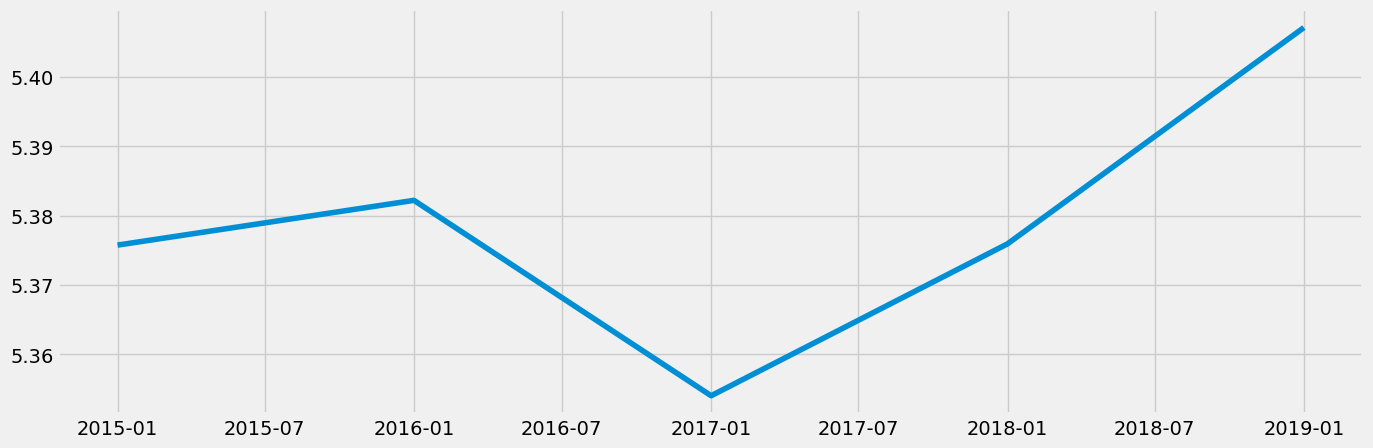

In [22]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_2)

#### The years (x-axis) have been split into 6 month intervals (e.g., 2015-01 and 2015-07).

In [23]:
# Check for missing values

df_2.isnull().sum()

Score    0
dtype: int64

In [24]:
# Check for duplicates

dups = df_2.duplicated()
dups.sum()

0

# 3. Time series analysis: decomposition

In [25]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

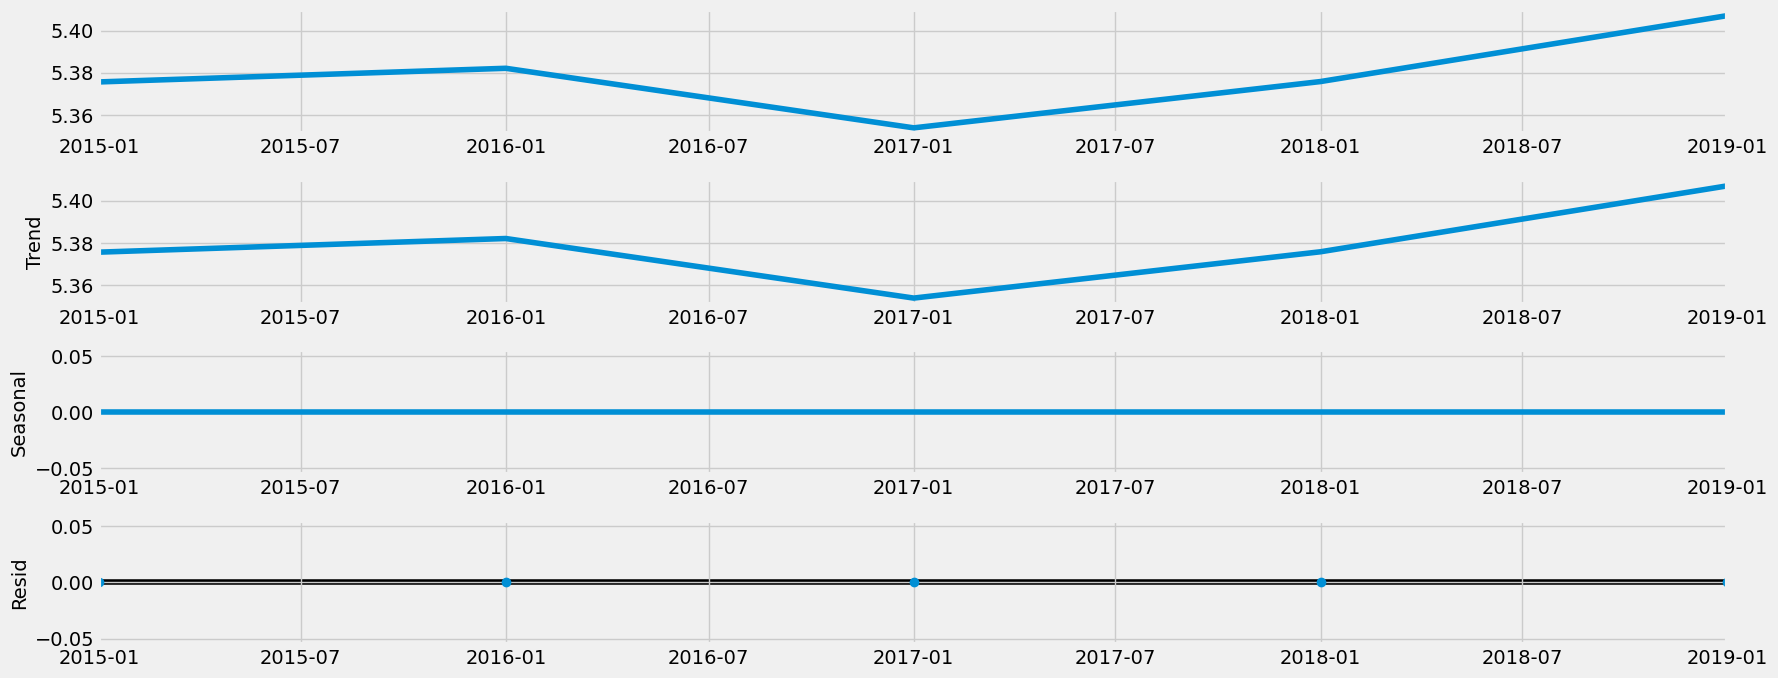

In [27]:
# Plot the separate components

decomposition.plot()
plt.show()

# 4. Testing for stationarity

In [28]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2['Score'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.937653
p-value                        0.775320
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


#### We are not able to reject the null hypothesis because the test statistic is larger than the critical value. The test result is not significant because the p-value is not less than 0.05. In this case, using a significance level of 5%, the Critical Value (5%) has a value of -4.474365 which is smaller than the Test Statistic with a value of -0.937653. There is a unit root in this data and the data is non-stationary.

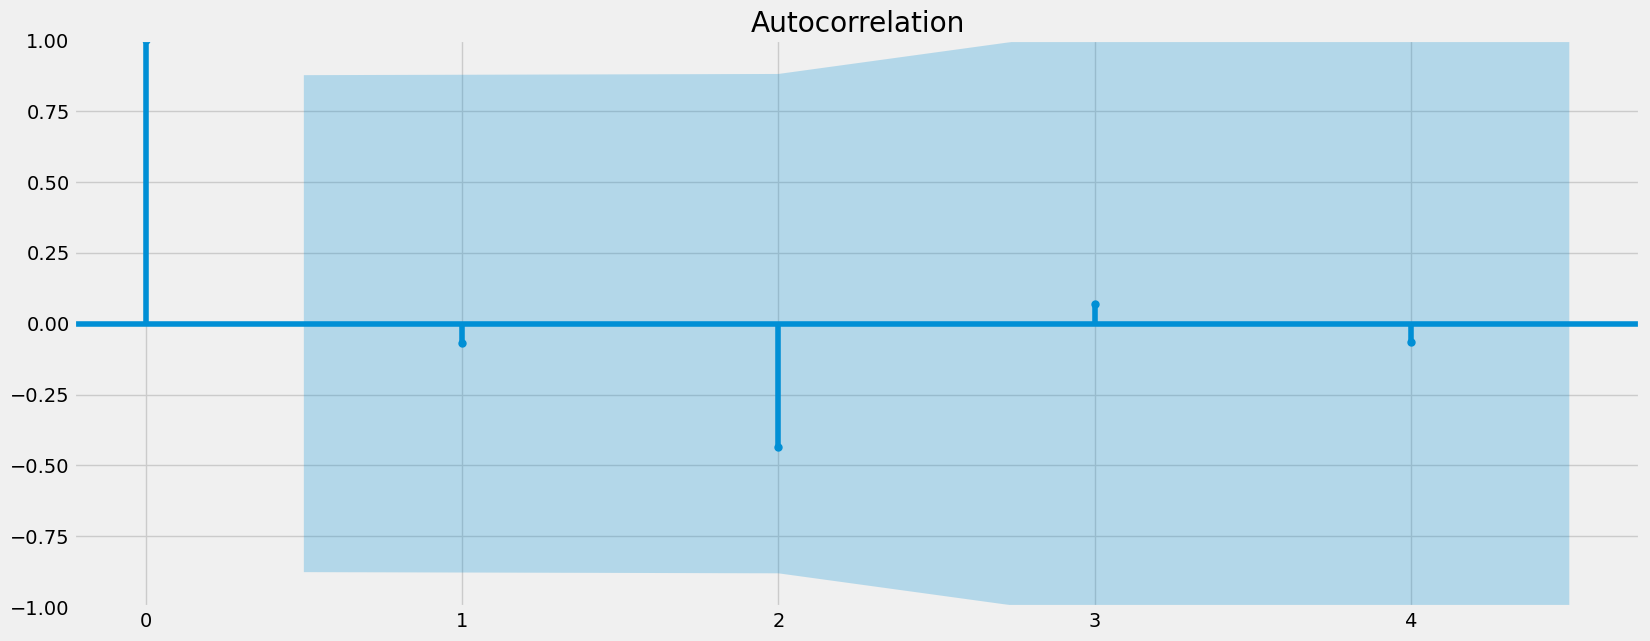

In [29]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_2)
plt.show()

# 5. Stationarizing the World Happiness Report Data

In [30]:
data_diff = df_2 - df_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [31]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [32]:
data_diff.head()

,Score
Year,
2016-01-01,0.006451
2017-01-01,-0.028165
2018-01-01,0.021897
2019-01-01,0.031179


In [33]:
data_diff.columns

Index(['Score'], dtype='object')

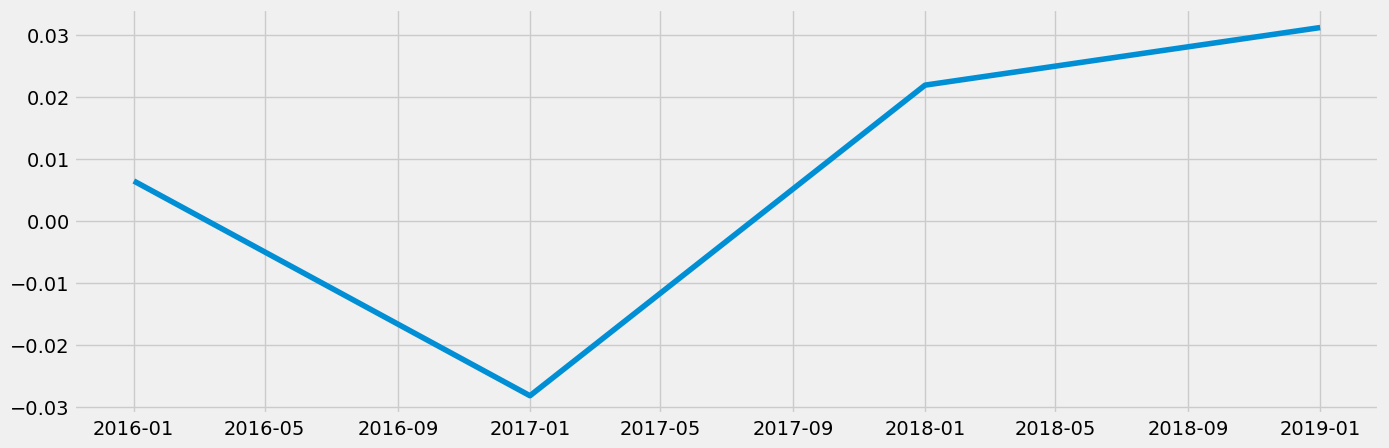

In [34]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [35]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.876918
p-value                         0.795478
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


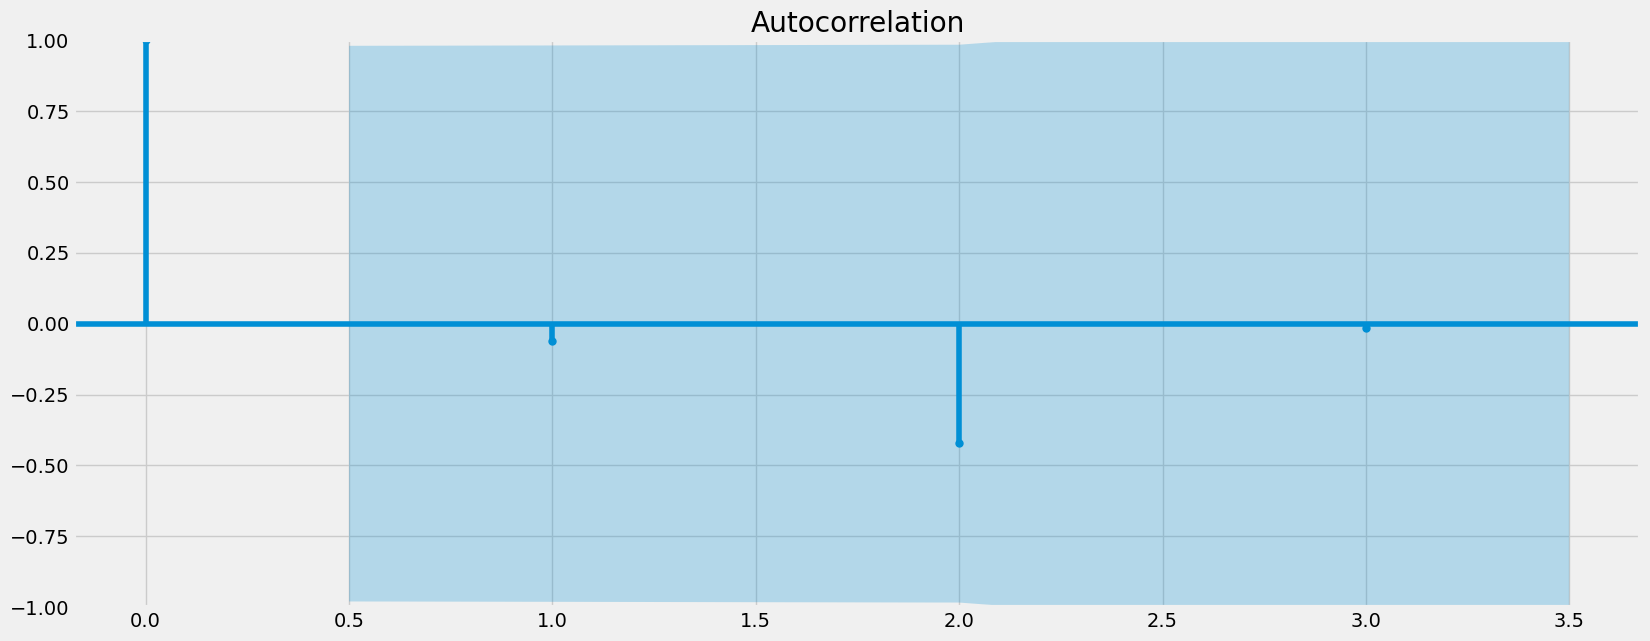

In [36]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

# 6. Results

#### Using the Dickey-Fuller Test, we see that the data is non-stationary because the test statistic is larger than the critical value. Testing for autocorrelation, we see that there is one lag (line) that is outside the confidence interval (blue area). The two tests are contradictory mainly due to there being so few values.

#### Attempting to stationarize the data using differencing, we see that the using the Dickey-Fuller Test and testing for autocorrelation gives the same contradictory results (the test statistic is larger than the critical value and there is only one lag outside the confidence interval).

#### Different algorithms were used for forecasting models, but was unsuccessful due to most algorithms being based on an hourly or daily basis. Also, because there are only 5 years (giving us 5 values for the mean happiness score), using an additive seasonal method resulted in null values.